In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can writeup to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linking-writing-processes-to-writing-quality/sample_submission.csv
/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv
/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv


In [2]:
train_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_logs.csv')
test_logs = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/test_logs.csv')
train_scores = pd.read_csv('/kaggle/input/linking-writing-processes-to-writing-quality/train_scores.csv')

In [3]:
train_logs.shape #8405898 entradas y 11 variables

(8405898, 11)

In [4]:
train_logs

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [5]:
train_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


Columna id

In [6]:
len(train_logs.groupby('id').count())#en realidad lo que tenemos son 2471 observaciones

2471

In [7]:
len(train_scores)#confirmamos que coinciden

2471

Columna event_id

In [8]:
train_logs[['id','event_id']].groupby('id').last()#número de eventos

,event_id
id,
001519c8,2557
0022f953,2454
0042269b,4136
0059420b,1556
0075873a,2531
...,...
ffb8c745,4739
ffbef7e5,2604
ffccd6fd,3063


<Axes: xlabel='event_id'>

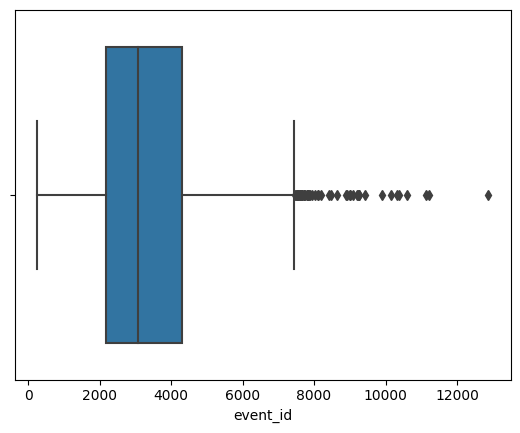

In [9]:
import seaborn as sns
sns.boxplot(x=train_logs[['id','event_id']].groupby('id').last()['event_id'])

Columna down_time

In [10]:
fig, ax = plt.subplots(nrows= 1,ncols=1)
ax.plot(train_scores.id,train_logs[['id','down_time']].groupby('id').first()['down_time'] )#observamos un outlier, habría que estudiarlo.

NameError: name 'plt' is not defined

Columna up_time

In [ ]:
fig, ax = plt.subplots(nrows= 1,ncols=1)
ax.scatter(train_scores.id,train_logs[['id','up_time']].groupby('id').last()['up_time'] ,alpha= 0.1)

In [ ]:
(train_logs.up_time-train_logs.down_time < 0).sum()#Lo que sí vemos es que no hay inconsistencias de que up_time sea menor que down_time

Columna action_time

In [ ]:
(train_logs['up_time'] - train_logs['down_time'] != train_logs['action_time']).sum()# es consistente con la definición de action time.

In [ ]:
train_logs[['id','action_time']].groupby('id').sum()

In [ ]:
sns.boxplot(x=train_logs[['id','action_time']].groupby('id').sum()['action_time'])

Columna activity

In [ ]:
print(train_logs.activity.unique())
#Las categorías se clasifican en:
#Nonproduction,Input,Remove/Cut,Replace,Paste,Move From [] To []

In [ ]:
#Frecuencia de cada actividad
train_logs[['id','activity']].groupby('activity').count().sort_values(by='id',ascending = False)

In [ ]:
#Veamos la frecuencia de los usuarios de las 5 primeras actividades
train_logs.loc[train_logs.activity == 'Input',['id','activity']].groupby('id').count()

In [ ]:
train_logs.loc[train_logs.activity == 'Remove/Cut',['id','activity']].groupby('id').count()

In [ ]:
train_logs.loc[train_logs.activity == 'Nonproduction',['id','activity']].groupby('id').count().describe()

In [ ]:
train_logs.loc[train_logs.activity == 'Replace',['id','activity']].groupby('id').count()

In [ ]:
train_logs.loc[train_logs.activity == 'Paste',['id','activity']].groupby('id').count()

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows= 2,ncols=3,figsize=(15, 10))
axs[0,0].scatter(train_scores.id,train_logs.loc[train_logs.activity == 'Input',['id','activity']].groupby('id').count()['activity'],alpha=0.1)
axs[0,0].set_xlabel('Input')
axs[0,1].scatter(train_scores.id,train_scores.merge(train_logs.loc[train_logs.activity == 'Remove/Cut',['id','activity']].groupby('id').count(),on='id',how='left').fillna(0)['activity'],alpha=0.1)
axs[0,1].set_xlabel('Remove/Cut')
axs[0,2].scatter(train_scores.id,train_logs.loc[train_logs.activity == 'Nonproduction',['id','activity']].groupby('id').count()['activity'],alpha=0.1)
axs[0,2].set_xlabel('Nonproduction')
axs[1,0].scatter(train_scores.id,train_scores.merge(train_logs.loc[train_logs.activity == 'Replace',['id','activity']].groupby('id').count(),on='id',how='left').fillna(0)['activity'],alpha=0.1)
axs[1,0].set_xlabel('Replace')
axs[1,1].scatter(train_scores.id,train_scores.merge(train_logs.loc[train_logs.activity == 'Paste',['id','activity']].groupby('id').count(),on='id',how='left').fillna(0)['activity'],alpha=0.1)
axs[1,1].set_xlabel('Paste')

Columna down_event

In [ ]:
train_logs[['id','down_event']].groupby('down_event').count().sort_values(by='id',ascending = False)[:20]

In [ ]:
train_logs.loc[train_logs.down_event == 'Space',['id','down_event']].groupby('id').count()

In [ ]:
fig, ax = plt.subplots(nrows= 1,ncols=1)
ax.scatter(train_scores.id,train_logs.loc[train_logs.down_event == 'Space',['id','down_event']].groupby('id').count()['down_event'],alpha = 0.1)

Columna up_event

In [ ]:
train_logs[['id','up_event']].groupby('up_event').count().sort_values(by='id',ascending = False)[:20]

In [ ]:
train_logs.loc[train_logs.up_event == 'Backspace',['id','up_event']].groupby('id').count()

In [ ]:
train_logs.loc[train_logs.down_event == train_logs.up_event].count()#8405364/8405898*100 = 99.9936473176334

Columna text_change

In [ ]:
#Veamos los posibles valores de text_change
train_logs[['id','text_change']].groupby('text_change').count().sort_values(by='id',ascending = False)[:20]

Columna cursor_position

In [ ]:
train_logs[['id','cursor_position']].groupby('id').mean()

Columna word_count

In [ ]:
train_logs[['id','word_count']].groupby('id').last()

In [ ]:
sns.boxplot(x=train_logs[['id','word_count']].groupby('id').last()['word_count'])

Columna Score


In [ ]:
train_scores.groupby('score').count()

In [ ]:
train_scores.describe()

Valores perdidos

In [ ]:
train_logs.isnull().sum()# no hay ningún valor perdido

In [ ]:
train_scores.isnull().sum()# no hay ningún valor perdido

Ingeniería de características

In [ ]:
#Variables n_*, len_*
def n_nonprod(df):
    x = df.loc[(df['activity'] == 'Nonproduction')& (df['action_time']>0),
               ['id','event_id']].groupby('id').count().rename(
        columns = {'event_id':'n_nonprod'}).reset_index()
    return x

def len_nonprod(df):
    x = df.loc[df['activity'] == 'Nonproduction',['id','action_time']].groupby('id').sum().rename(
         columns = {'action_time':'len_nonprod'}).reset_index()
    return x

def n_input(df):
    x = df.loc[(df['activity'] == 'Input')& (df['action_time']>0),
               ['id','event_id']].groupby('id').count().rename(
        columns = {'event_id':'n_input'}).reset_index()
    return x

def len_input(df):
    x = df.loc[df['activity'] == 'Input',['id','action_time']].groupby('id').sum().rename(
         columns = {'action_time':'len_input'}).reset_index()
    return x

def n_replace(df):
    x = df.loc[(df['activity'] == 'Replace')& (df['action_time']>0),
               ['id','event_id']].groupby('id').count().rename(
        columns = {'event_id':'n_replace'}).reset_index()
    return x


def len_replace(df):
    x = df.loc[df['activity'] == 'Replace',['id','action_time']].groupby('id').sum().rename(
         columns = {'action_time':'len_replace'}).reset_index()
    return x

def n_remove(df):
    x = df.loc[(df['activity'] == 'Remove/Cut')& (df['action_time']>0),
               ['id','event_id']].groupby('id').count().rename(
        columns = {'event_id':'n_remove'}).reset_index()
    return x

def len_remove(df):
    x = df.loc[df['activity'] == 'Remove/Cut',['id','action_time']].groupby('id').sum().rename(
         columns = {'action_time':'len_remove'}).reset_index()
    return x

In [ ]:
def n_words(df):
    x = df[['id','word_count']].groupby('id').last()
    return x

def act_time(df):
    x = df.groupby('id')['action_time'].sum().reset_index().rename(
        columns = {'action_time':'act_time'})
    return x
def writing_time(df):
    x = pd.DataFrame(df.groupby('id').last()['up_time']).reset_index().rename(columns={'up_time':'writing_time'})
    return x

def n_events(df):
    x = df[['id','event_id']].groupby('id').count().reset_index().rename(columns={'event_id':'n_events'})
    return x

def punct(df):
    x = df.loc[df.down_event.isin(['"', '.', ',', "'", '-', ';', ':', '?', '!', '<', '>', '/',
                        '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+']),['id','down_event']].groupby('id').count().rename(columns={'down_event':'punct'})
    return x
    

#def arrows(df): correlacion de 0.05
#    x = df.loc[df.down_event.isin(['ArrowRight','ArrowLeft','ArrowUp','ArrowDown']),['id','down_event']].groupby('id').count().rename(columns={'down_event' : 'arrows'})
#    return x

#def comenzar(df):
#    x = pd.DataFrame(df.groupby('id').first()['down_time']).reset_index().rename(columns={'down_time':'start_time'})
#    return x

def cuenta_frases(df):
    x = df.loc[df.down_event == '.','id'].count()
    return x

def cuenta_punct(df):
    x = df.loc[df.down_event.isin(['"', '.', ',', "'", '-', ';', ':', '?', '!', '<', '>', '/',
                        '@', '#', '$', '%', '^', '&', '*', '(', ')', '_', '+']),'id'].count()  
    return x

#varianza del proceso,dividir el tiempo de 5 a 10 intervalos y ver el num de frases producidas

def numfrases_intervalo(df):
    dic = []
    for nombre, datos in df.groupby('id'):
        dic.append(np.min([cuenta_frases(h) for h in np.array_split(datos,indices_or_sections = 2)]))
    x = pd.DataFrame({'id': df.id.unique(),'numfrases_intervalo':dic})
    return x   
def numpunct_intervalo(df):
    dic = []
    for nombre, datos in df.groupby('id'):
        dic.append(np.max([cuenta_punct(h) for h in np.array_split(datos,indices_or_sections = 5)]))
    x = pd.DataFrame({'id': df.id.unique(),'numpunct_intervalo':dic})
    return x
def cursor_position_mean(df):
    x = df[['id','cursor_position']].groupby('id').mean().rename(
         columns = {'cursor_position':'cursor_position_mean'}).reset_index()
    return x

def n_remove2(df):
    x = df.loc[df.down_event.isin(['Backspace','Delete']),['id','down_event']].groupby('id').count().rename(columns={'down_event':'n_remove2'})
    return x

def n_parrafos(df):
    x = df.loc[df.down_event=='Enter',['id','down_event']].groupby('id').count().rename(columns={'down_event':'n_parrafos'})
    return x
def n_dropenter(df):
    x = df.loc[(df['text_change'] == '\n') & (df['activity'] == 'Remove/Cut'),['id','text_change']].groupby('id').count().rename(columns={'text_change':'n_dropenter'}) 
    return x

def doblenter(df):
    texto = train_logs.loc[train_logs.down_event=='Enter',['id','event_id','down_event']].groupby('id')
    dic = {'id':[],'num_parrafos':[]}
    for nombre, datos in texto:
        lista = [h for h in datos['event_id']]
        dic['id'].append(nombre)
        dic['num_parrafos'].append(np.sum([1 if ((h+1 in lista) and (h+2 not in lista)) else 0 for h in lista]))
    x = pd.DataFrame(dic)
    return x


def n_space(df):
    x = df.loc[df.down_event=='Space',['id','down_event']].groupby('id').count().rename(columns={'down_event':'n_space'})
    return x
    
def no_change(df):
    x = df.loc[df.text_change == 'NoChange',['id','text_change']].groupby('id').count().rename(columns = {'text_change':'num_nochange'})
    return x 
    
def cuenta_textchange(df):
    x = df.loc[df.activity == 'Replace','text_change'].reset_index(drop=True)
    return x 

def num_shift(df):
    x = df.loc[df.down_event == 'Shift',['id','down_event']].groupby('id').count().rename(columns = {'down_event':'num_shift'})
    return x

In [ ]:
train_logs

In [ ]:
def DatFeatures(df):
    dataframe = n_input(df)
    features = [len_input,n_nonprod,len_nonprod,n_remove,len_remove,
               n_replace,len_replace,n_events,n_words,
                act_time,writing_time,punct,numfrases_intervalo,cursor_position_mean,n_remove2,n_parrafos,n_space,n_dropenter,no_change,
               num_shift,doblenter]
    
    for fun in features:
        prev_dat = fun(df).fillna(0)
        dataframe = dataframe.merge(prev_dat,on='id',how='left').fillna(0)
    dataframe['pausa'] = dataframe['writing_time'] - dataframe['act_time']
    dataframe['time_by_word'] = (dataframe['writing_time']/dataframe['word_count']).replace([np.inf, np.inf],500000)
    dataframe['productivity'] = dataframe['act_time']/dataframe['writing_time']*100
    dataframe['n_caracteres2'] = dataframe['n_input'] - dataframe['n_remove2']
    dataframe['n_parrafos2'] = dataframe['n_parrafos'] - dataframe['n_dropenter']
    dataframe = dataframe.drop(['n_parrafos','n_dropenter'],axis=1)
    return dataframe

In [ ]:
test_features = DatFeatures(test_logs)
train_features = DatFeatures(train_logs)

In [ ]:
train_dat = train_scores.merge(train_features,on='id',how='left')
train_dat

In [ ]:
y = train_dat['score']

In [ ]:
X_train = train_features.drop('id',axis=1)
X_test = test_features.drop('id',axis=1)

In [ ]:
(train_dat.drop('id',axis=1)).corr()#vemos la correlación de las variables con la objetivo.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(nrows= 1,ncols=3,figsize = (15,5))
sns.histplot(ax=axs[0],data=train_features, x="n_events")
sns.histplot(ax=axs[1],data=train_features, x="n_input")
sns.histplot(ax=axs[2],data=train_features, x="punct")
#observamos gráficas muy sesgadas a la derecha,realizaremos una normalización de las variables y corregiremos esta asimetría.

In [ ]:
from scipy.stats import skew,boxcox
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
X_transformed = pd.DataFrame(transformer.fit_transform(X_train))
X_transformed.columns = X_train.columns
X_test_transformed = pd.DataFrame(transformer.transform(X_test))
X_test_transformed.columns = X_test.columns

In [ ]:
X_transformed

In [ ]:
correl = (train_scores.drop('id',axis=1)).merge(X_transformed,how='left',left_index=True,right_index=True)
correl.corr()#la matriz de correlaciones ha cambiado, en su mayoría éstas han aumentado con respecto a la variable Score.